# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [110]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.shape

(7, 3)

In [6]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [7]:
new_york = temp.loc[temp['State'] == "New York"]
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
# your answer here
new_york["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
above_15 = temp.loc[temp['Temperature'] > 15]
above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
cities_temp = temp[["City", "Temperature"]].loc[temp["Temperature"]>15]
cities_temp

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [27]:


cities_15_20 = temp[["City", "Temperature"]][(temp["Temperature"]>15) & (temp["Temperature"]<20)]
cities_15_20

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [37]:
temp["State"].value_counts()

New York       3
Connecticut    2
New Jersey     2
Name: State, dtype: int64

In [39]:
new_york = temp.loc[temp['State'] == "New York"]
connecticut = temp.loc[temp['State'] == "Connecticut"]
new_jersey = temp.loc[temp['State'] == "New Jersey"]

connecticut

,City,State,Temperature
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


In [41]:
new_york_mean = new_york["Temperature"].mean()
new_york_mean

10.74074074074074

In [45]:
new_york_std = new_york["Temperature"].std()
new_york_std

8.133404168888054

In [42]:
connecticut_mean = connecticut["Temperature"].mean()
connecticut_mean

15.833333333333332

In [46]:
connecticut_std = connecticut["Temperature"].std()
connecticut_std

1.9641855032959645

In [44]:
new_jersey_mean = new_jersey["Temperature"].mean()
new_jersey_mean


21.11111111111111

In [47]:
new_jersey_std = new_jersey["Temperature"].std()
new_jersey_std

1.5713484026367717

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [49]:
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [51]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [55]:

employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


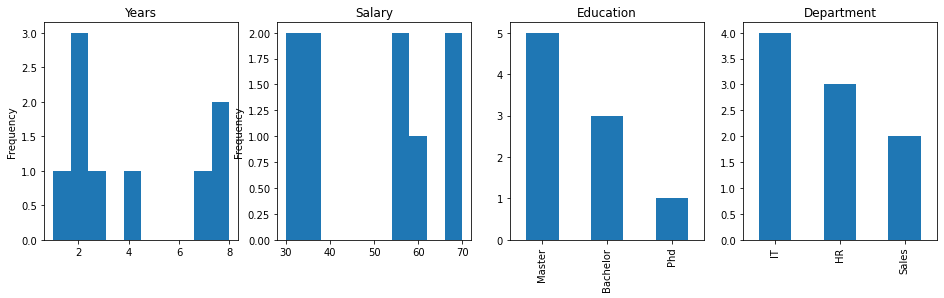

In [56]:

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

employee['Years'].plot(kind='hist', bins=10, ax=axs[0], title='Years')
employee['Salary'].plot(kind='hist', bins=10, ax=axs[1], title='Salary')
employee['Education'].value_counts().plot(kind='bar', ax=axs[2], title='Education')
employee['Department'].value_counts().plot(kind='bar', ax=axs[3], title='Department')

plt.show()


#### What's the average salary in this company?

In [57]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [58]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [59]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [60]:
employee.loc[employee['Salary'] == 30]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [61]:
employee.loc[employee['Name'] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [64]:
employee[["Name", "Salary"]].loc[employee['Name'] == "David"]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [66]:
employee.loc[employee['Title'] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [67]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [76]:
employee.head(-6)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [77]:
employee[["Name", "Title", "Salary"]][(employee["Title"]=="associate") & (employee["Salary"]>55)]


,Name,Title,Salary
7,Pedro,associate,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [81]:
employee.groupby('Years')['Salary'].mean()



Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [82]:
employee.groupby('Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [124]:
q1 = employee['Salary'].quantile(0.25)
print("First Quartile (Q1): ", q1)



First Quartile (Q1):  35.0


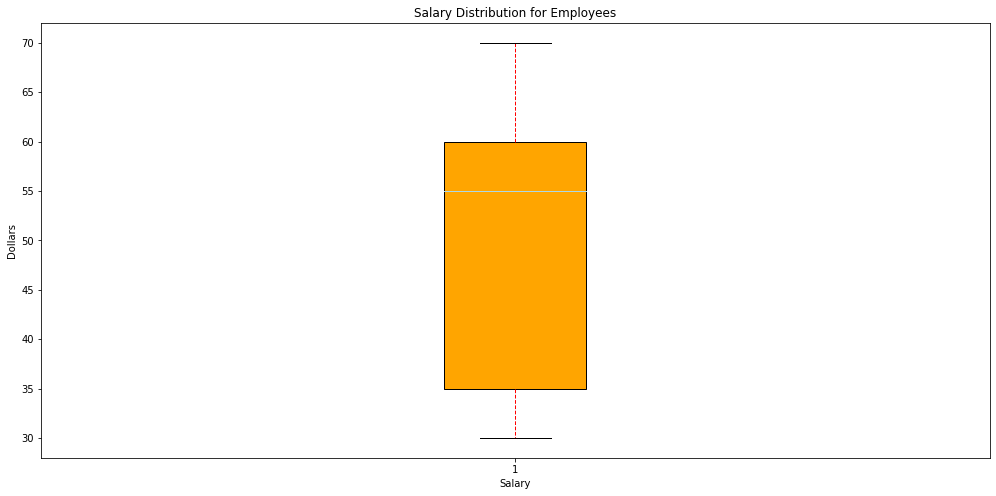

In [122]:


fig, ax = plt.subplots(figsize=(17, 8))
ax.boxplot(employee['Salary'], notch=False, patch_artist=True,
           boxprops=dict(facecolor="orange", color='black'),
           whiskerprops=dict(color='red', linestyle='--'),
           capprops=dict(color='black'),
           medianprops=dict(color='lightblue'))
ax.set_xlabel('Salary')
ax.set_ylabel('Dollars')
ax.set_title('Salary Distribution for Employees')


plt.show()





In [123]:
q3 = employee['Salary'].quantile(0.75)
print("Third Quartile (Q3): ", q3)

Third Quartile (Q3):  60.0


#### Is the mean salary per gender different?

In [83]:
employee.groupby('Gender')['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here